# Excelerate Data Analysis and Predictive Modeling

In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_excel("Excelerate Student Engament Data..xlsx")
df

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date
0,06/14/2023 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Faria,2001-12-01 00:00:00,Female,Pakistan,Nwihs,Radiology,2024-11-03 12:01:41,Started,1080,06/14/2023 12:36:09,2022-03-11 18:30:39
1,2023-01-05 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Poojitha,08/16/2000,Female,India,SAINT LOUIS,Information Systems,2024-11-03 12:01:41,Started,1080,2023-01-05 06:08:21,2022-03-11 18:30:39
2,2023-09-04 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Emmanuel,01/27/2002,Male,United States,Illinois Institute of Technology,Computer Science,2024-11-03 12:01:41,Started,1080,"45235 days, 0:21:29",2022-03-11 18:30:39
3,08/29/2023 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Amrutha Varshini,1999-01-11 00:00:00,Female,United States,Saint Louis University,Information Systems,2024-11-03 12:01:41,Team Allocated,1070,2023-09-10 22:02:42,2022-03-11 18:30:39
4,2023-06-01 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Vinay Varshith,04/19/2000,Male,United States,Saint Louis University,Computer Science,2024-11-03 12:01:41,Started,1080,2023-06-01 15:40:10,2022-03-11 18:30:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8553,2024-05-03 16:39:21,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,Selam,10/14/2006,Female,Ethiopia,Lideta Catholic Cathedral School,Computer Science,2024-11-03 12:03:14,Team Allocated,1070,2024-05-03 17:10:41,2024-08-03 14:00:00
8554,2024-06-03 15:58:47,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,Gowri Sailesh,05/18/1999,Male,United States,SAINT LOUIS UNIVERSITY,Information Systems,2024-11-03 12:03:14,Team Allocated,1070,2024-06-03 18:22:11,2024-08-03 14:00:00
8555,02/29/2024 15:02:31,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,Abiola,03/16/1999,Male,Nigeria,Tai Solarin university of Education,Political Science,2024-11-03 12:03:14,Team Allocated,1070,02/29/2024 15:10:06,2024-08-03 14:00:00
8556,12/23/2023 03:53:12,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,venumadhavi,1997-05-06 00:00:00,Female,United States,Saint Louis University,Information Systems,2024-11-03 12:03:14,Team Allocated,1070,02/27/2024 06:48:47,2024-08-03 14:00:00


DATA CLEANING:

In [ ]:
#Cleaning columns names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df

In [4]:
#Converting date columns to datetime.
date_cols = [
    'learner_signup_datetime', 'opportunity_end_date', 'date_of_birth',
    'entry_created_at', 'apply_date', 'opportunity_start_date'
]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [5]:
#Normalizing gender values
df['gender'] = df['gender'].str.lower()
df['gender'] = df['gender'].replace({
    'f': 'female', 'm': 'male', 'fem': 'female', 'mal': 'male',
    'female ': 'female', 'male ': 'male'
})


In [6]:
#Indentifying and Removi duplicates
duplicates = df.duplicated()
duplicates

df = df.drop_duplicates()

In [7]:
#Adding age and date features
df['age'] = pd.Timestamp.today().year - df['date_of_birth'].dt.year
df['signup_date'] = df['learner_signup_datetime'].dt.date
df['signup_month'] = df['learner_signup_datetime'].dt.to_period("M")

In [8]:
#fixing types and reset index
df = df.reset_index(drop=True)

In [9]:
#saving data to csv
df.to_csv("cleaned_slu_data.csv", index=False)

In [10]:
print("Cleaned Data Preview:")
print(df.head())
print(f"Cleaned dataset shape: {df.shape}")

Cleaned Data Preview:
  learner_signup_datetime                  opportunity_id  \
0     2023-06-14 12:30:35  00000000-0GN2-A0AY-7XK8-C5FZPP   
1     2023-01-05 05:29:16  00000000-0GN2-A0AY-7XK8-C5FZPP   
2     2023-09-04 20:35:08  00000000-0GN2-A0AY-7XK8-C5FZPP   
3     2023-08-29 05:20:03  00000000-0GN2-A0AY-7XK8-C5FZPP   
4     2023-06-01 15:26:36  00000000-0GN2-A0AY-7XK8-C5FZPP   

                                    opportunity_name opportunity_category  \
0  Career Essentials: Getting Started with Your P...               Course   
1  Career Essentials: Getting Started with Your P...               Course   
2  Career Essentials: Getting Started with Your P...               Course   
3  Career Essentials: Getting Started with Your P...               Course   
4  Career Essentials: Getting Started with Your P...               Course   

  opportunity_end_date        first_name date_of_birth  gender        country  \
0  2024-06-29 18:52:39             Faria    2001-12-01  female     

FEATURE ENGINEERING:

In [11]:
# 1. Signup Time Features
df['signup_hour'] = df['learner_signup_datetime'].dt.hour
df['signup_weekday'] = df['learner_signup_datetime'].dt.day_name()
df['signup_quarter'] = df['learner_signup_datetime'].dt.quarter

In [12]:
# 2. Age Group Bucketing
bins = [0, 17, 24, 34, 44, 54, 64, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [13]:
# 3. Completion Time (days between signup and opportunity end)
df['completion_time_days'] = (df['opportunity_end_date'] - df['learner_signup_datetime']).dt.days

In [14]:
# 4. Opportunity Duration
df['opportunity_duration'] = (df['opportunity_end_date'] - df['opportunity_start_date']).dt.days

In [15]:
# 5. Completion Status (boolean)
df['is_completed'] = df['status_description'].str.lower().str.contains('completed')

In [16]:
# 6. Fill missing values
df['completion_time_days'] = df['completion_time_days'].fillna(-1)
df['opportunity_duration'] = df['opportunity_duration'].fillna(-1)

In [17]:
#Previewing the  engineered features
print(df[['signup_hour', 'signup_weekday', 'signup_quarter', 'age', 'age_group',
          'completion_time_days', 'opportunity_duration', 'is_completed']].head())

   signup_hour signup_weekday  signup_quarter  age age_group  \
0         12.0      Wednesday             2.0   24     18-24   
1          5.0       Thursday             1.0   25     25-34   
2         20.0         Monday             3.0   23     18-24   
3          5.0        Tuesday             3.0   26     25-34   
4         15.0       Thursday             2.0   25     25-34   

   completion_time_days  opportunity_duration  is_completed  
0                 381.0                 841.0         False  
1                 541.0                 841.0         False  
2                 298.0                 841.0         False  
3                 305.0                 841.0         False  
4                 394.0                 841.0         False  


In [18]:
print(df.head(10))

  learner_signup_datetime                  opportunity_id  \
0     2023-06-14 12:30:35  00000000-0GN2-A0AY-7XK8-C5FZPP   
1     2023-01-05 05:29:16  00000000-0GN2-A0AY-7XK8-C5FZPP   
2     2023-09-04 20:35:08  00000000-0GN2-A0AY-7XK8-C5FZPP   
3     2023-08-29 05:20:03  00000000-0GN2-A0AY-7XK8-C5FZPP   
4     2023-06-01 15:26:36  00000000-0GN2-A0AY-7XK8-C5FZPP   
5     2024-02-03 19:16:07  00000000-0GN2-A0AY-7XK8-C5FZPP   
6     2023-05-31 07:11:04  00000000-0GN2-A0AY-7XK8-C5FZPP   
7     2023-07-22 07:30:25  00000000-0GN2-A0AY-7XK8-C5FZPP   
8     2023-03-20 16:36:30  00000000-0GN2-A0AY-7XK8-C5FZPP   
9     2023-11-05 03:40:33  00000000-0GN2-A0AY-7XK8-C5FZPP   

                                    opportunity_name opportunity_category  \
0  Career Essentials: Getting Started with Your P...               Course   
1  Career Essentials: Getting Started with Your P...               Course   
2  Career Essentials: Getting Started with Your P...               Course   
3  Career Essentials

EXPLORATORY DATA ANALYSIS:

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   learner_signup_datetime  8263 non-null   datetime64[ns]
 1   opportunity_id           8558 non-null   object        
 2   opportunity_name         8558 non-null   object        
 3   opportunity_category     8558 non-null   object        
 4   opportunity_end_date     7296 non-null   datetime64[ns]
 5   first_name               8558 non-null   object        
 6   date_of_birth            8558 non-null   datetime64[ns]
 7   gender                   8558 non-null   object        
 8   country                  8558 non-null   object        
 9   institution_name         8553 non-null   object        
 10  current/intended_major   8553 non-null   object        
 11  entry_created_at         8558 non-null   datetime64[ns]
 12  status_description       8558 non-

In [20]:
df.count

<bound method DataFrame.count of      learner_signup_datetime                  opportunity_id  \
0        2023-06-14 12:30:35  00000000-0GN2-A0AY-7XK8-C5FZPP   
1        2023-01-05 05:29:16  00000000-0GN2-A0AY-7XK8-C5FZPP   
2        2023-09-04 20:35:08  00000000-0GN2-A0AY-7XK8-C5FZPP   
3        2023-08-29 05:20:03  00000000-0GN2-A0AY-7XK8-C5FZPP   
4        2023-06-01 15:26:36  00000000-0GN2-A0AY-7XK8-C5FZPP   
...                      ...                             ...   
8553     2024-05-03 16:39:21  00000000-10GQ-RJHT-3G4S-BKGBY1   
8554     2024-06-03 15:58:47  00000000-10GQ-RJHT-3G4S-BKGBY1   
8555     2024-02-29 15:02:31  00000000-10GQ-RJHT-3G4S-BKGBY1   
8556     2023-12-23 03:53:12  00000000-10GQ-RJHT-3G4S-BKGBY1   
8557     2023-01-06 13:22:01  00000000-10GQ-RJHT-3G4S-BKGBY1   

                                       opportunity_name opportunity_category  \
0     Career Essentials: Getting Started with Your P...               Course   
1     Career Essentials: Getting Start

In [21]:
df.describe

<bound method NDFrame.describe of      learner_signup_datetime                  opportunity_id  \
0        2023-06-14 12:30:35  00000000-0GN2-A0AY-7XK8-C5FZPP   
1        2023-01-05 05:29:16  00000000-0GN2-A0AY-7XK8-C5FZPP   
2        2023-09-04 20:35:08  00000000-0GN2-A0AY-7XK8-C5FZPP   
3        2023-08-29 05:20:03  00000000-0GN2-A0AY-7XK8-C5FZPP   
4        2023-06-01 15:26:36  00000000-0GN2-A0AY-7XK8-C5FZPP   
...                      ...                             ...   
8553     2024-05-03 16:39:21  00000000-10GQ-RJHT-3G4S-BKGBY1   
8554     2024-06-03 15:58:47  00000000-10GQ-RJHT-3G4S-BKGBY1   
8555     2024-02-29 15:02:31  00000000-10GQ-RJHT-3G4S-BKGBY1   
8556     2023-12-23 03:53:12  00000000-10GQ-RJHT-3G4S-BKGBY1   
8557     2023-01-06 13:22:01  00000000-10GQ-RJHT-3G4S-BKGBY1   

                                       opportunity_name opportunity_category  \
0     Career Essentials: Getting Started with Your P...               Course   
1     Career Essentials: Getting Star

In [22]:
df.shape

(8558, 26)

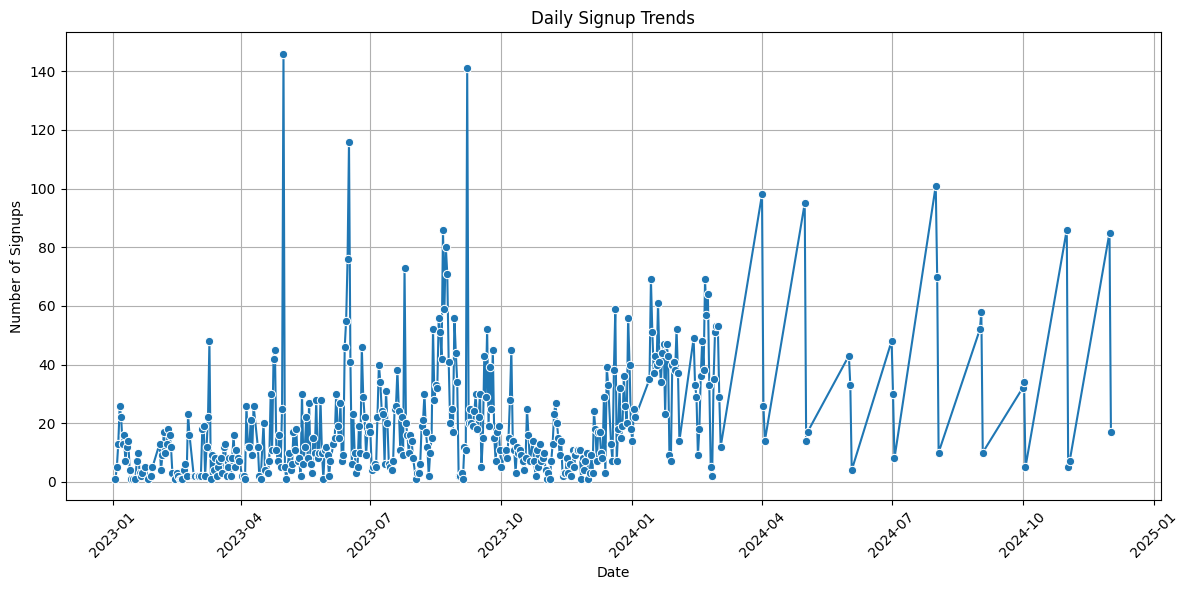

In [23]:
#Sign Up Trends

df['SignUp_Date'] = df['learner_signup_datetime'].dt.date
daily_signups = df['SignUp_Date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_signups.index, y=daily_signups.values, marker="o")
plt.title("Daily Signup Trends")
plt.xlabel("Date")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
df

,learner_signup_datetime,opportunity_id,opportunity_name,opportunity_category,opportunity_end_date,first_name,date_of_birth,gender,country,institution_name,...,signup_date,signup_month,signup_hour,signup_weekday,signup_quarter,age_group,completion_time_days,opportunity_duration,is_completed,SignUp_Date
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Faria,2001-12-01,female,Pakistan,Nwihs,...,2023-06-14,2023-06,12.0,Wednesday,2.0,18-24,381.0,841.0,False,2023-06-14
1,2023-01-05 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Poojitha,2000-08-16,female,India,SAINT LOUIS,...,2023-01-05,2023-01,5.0,Thursday,1.0,25-34,541.0,841.0,False,2023-01-05
2,2023-09-04 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Emmanuel,2002-01-27,male,United States,Illinois Institute of Technology,...,2023-09-04,2023-09,20.0,Monday,3.0,18-24,298.0,841.0,False,2023-09-04
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Amrutha Varshini,1999-01-11,female,United States,Saint Louis University,...,2023-08-29,2023-08,5.0,Tuesday,3.0,25-34,305.0,841.0,False,2023-08-29
4,2023-06-01 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Vinay Varshith,2000-04-19,male,United States,Saint Louis University,...,2023-06-01,2023-06,15.0,Thursday,2.0,25-34,394.0,841.0,False,2023-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8553,2024-05-03 16:39:21,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,Selam,2006-10-14,female,Ethiopia,Lideta Catholic Cathedral School,...,2024-05-03,2024-05,16.0,Friday,2.0,18-24,91.0,-1.0,False,2024-05-03
8554,2024-06-03 15:58:47,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,Gowri Sailesh,1999-05-18,male,United States,SAINT LOUIS UNIVERSITY,...,2024-06-03,2024-06,15.0,Monday,2.0,25-34,60.0,-1.0,False,2024-06-03
8555,2024-02-29 15:02:31,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,Abiola,1999-03-16,male,Nigeria,Tai Solarin university of Education,...,2024-02-29,2024-02,15.0,Thursday,1.0,25-34,155.0,-1.0,False,2024-02-29
8556,2023-12-23 03:53:12,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,venumadhavi,1997-05-06,female,United States,Saint Louis University,...,2023-12-23,2023-12,3.0,Saturday,4.0,25-34,224.0,-1.0,False,2023-12-23


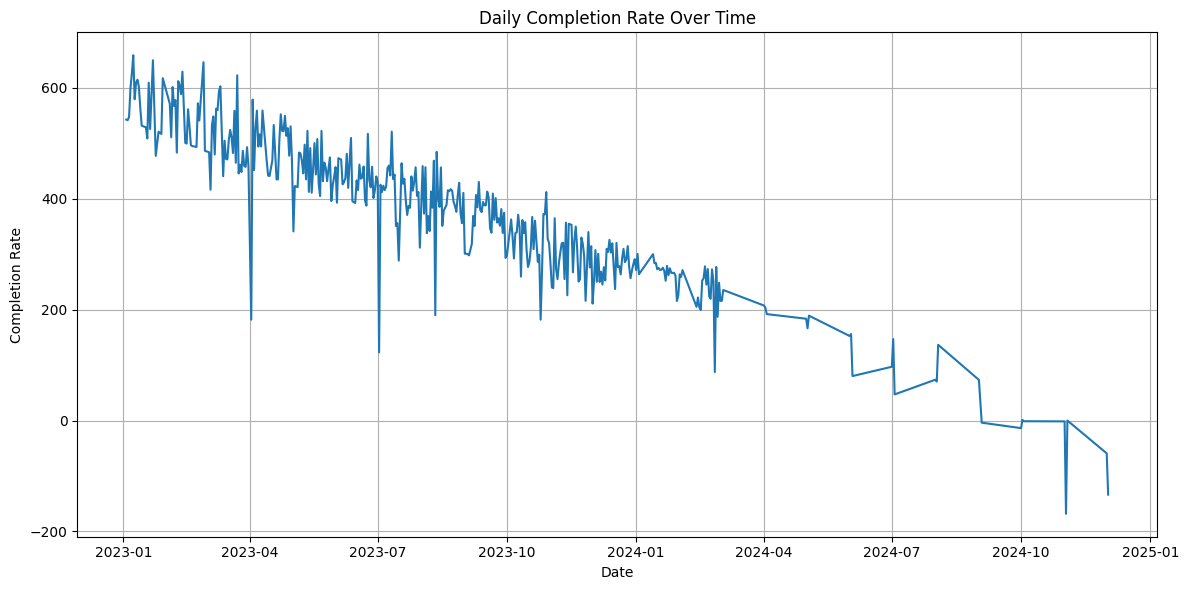

In [30]:
#Completion Trends
df['learner_signup_datetime'] = pd.to_datetime(df['learner_signup_datetime'], errors='coerce')
df['signup_date'] = df['learner_signup_datetime'].dt.date
completion_rate = df.groupby("signup_date")['completion_time_days'].mean()


plt.figure(figsize=(12, 6))
sns.lineplot(x=completion_rate.index, y=completion_rate.values)
plt.title("Daily Completion Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Completion Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

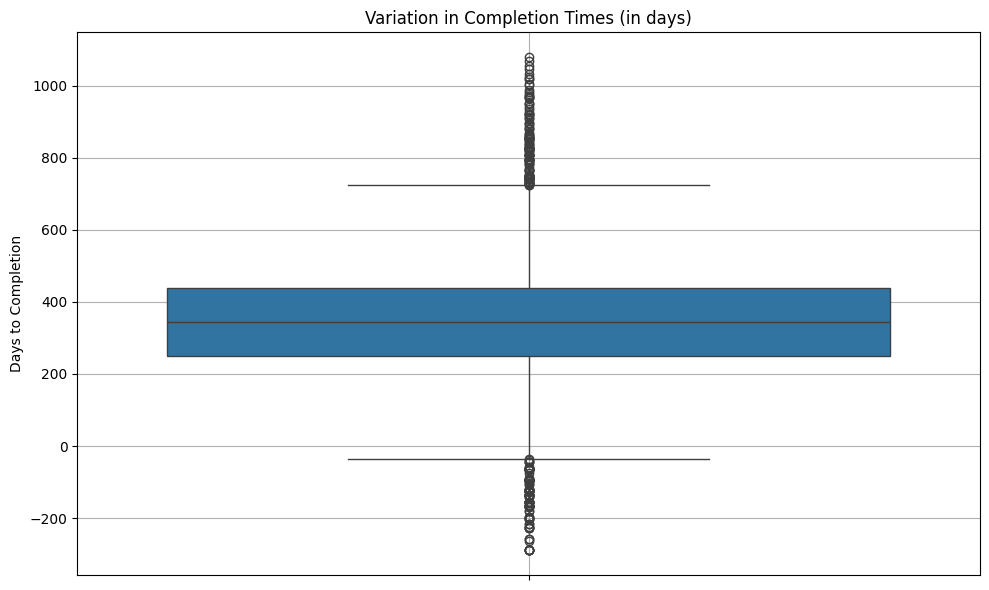

In [31]:
df['opportunity_end_date'] = pd.to_datetime(df['opportunity_end_date'], errors='coerce')
df['learner_signup_datetime'] = pd.to_datetime(df['learner_signup_datetime'], errors='coerce')

#Dropping rows with missing datetime values
df = df.dropna(subset=['opportunity_end_date', 'learner_signup_datetime'])

#Subtracting dates to calculate completion time in days
df['Completion_Time'] = (df['opportunity_end_date'] - df['learner_signup_datetime']).dt.days

#Ploting the distribution using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Completion_Time'])
plt.title("Variation in Completion Times (in days)")
plt.ylabel("Days to Completion")
plt.grid(True)
plt.tight_layout()
plt.show()


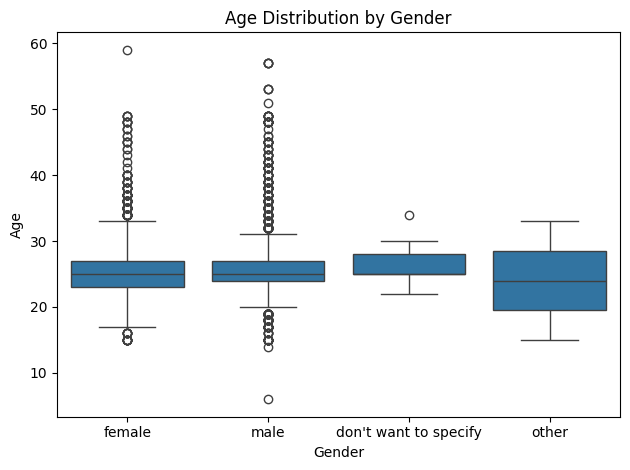

In [32]:
#Patterns and correlation
from datetime import datetime

df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')
df = df.dropna(subset=['date_of_birth'])

#Calculating age
df['age_group'] = datetime.now().year - df['date_of_birth'].dt.year

# Step 4: Boxplot of Age by Gender
sns.boxplot(data=df, x='gender', y='age_group')
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.tight_layout()
plt.show()


In [33]:
#Outliers & Anomalies


#Outlier detection in completion time
outliers = df[df['completion_time_days'] > df['completion_time_days'].quantile(0.95)]
print("Outliers in Completion Time:", outliers.shape[0])

#Low completion days
low_completion_days = completion_rate[completion_rate < 0.1]
print("Days with <10% Completion Rate:", low_completion_days)

Outliers in Completion Time: 349
Days with <10% Completion Rate: signup_date
2024-09-03     -3.875000
2024-10-01    -13.689655
2024-10-03     -1.250000
2024-11-01     -1.527778
2024-11-02   -168.250000
2024-11-03      0.000000
2024-12-01    -59.242857
2024-12-02   -133.714286
Name: completion_time_days, dtype: float64


In [34]:
#Recommendations (text output)
print("Recommendations:")
print("- Focus marketing on days with historically high signups.")
print("- Investigate outliers for longer completion times.")
print("- Consider targeted support for users from low-performing demographic groups.")
print("- Monitor completion trends for each opportunity type.")


Recommendations:
- Focus marketing on days with historically high signups.
- Investigate outliers for longer completion times.
- Consider targeted support for users from low-performing demographic groups.
- Monitor completion trends for each opportunity type.


CONCLUSION:

In [35]:
#Conclusion!!!!!!!!!!!!!!!!!
print("Conclusion:")
print("- Signup and completion patterns vary significantly over time.")
print("- Gender and age show demographic differences.")
print("- Actionable insights can guide marketing and user support strategies.")

Conclusion:
- Signup and completion patterns vary significantly over time.
- Gender and age show demographic differences.
- Actionable insights can guide marketing and user support strategies.


## MACHINE LEARNING

In [36]:
#Data Prep
y = LabelEncoder().fit_transform(df['status_code'])
X = pd.get_dummies(df.drop(['status_code', 'status_description'], axis=1), drop_first=True)
X = X.select_dtypes(include=[np.number])


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [38]:
X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train, y_train)
classes = np.unique(y)

In [39]:
#Train with GridSearch-
params = {'n_estimators': [100], 'learning_rate': [0.1], 'max_depth': [3]}
grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42), params,
    cv=3, scoring='roc_auc_ovr_weighted', n_jobs=-1
)
grid.fit(X_train_res, y_train_res)
model = grid.best_estimator_

In [40]:
#Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
y_bin = label_binarize(y_test, classes=classes)
auc = roc_auc_score(y_bin, y_proba, multi_class='ovr')

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("ROC AUC:", round(auc, 3))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.721
ROC AUC: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.60      0.37        20
           1       0.84      0.84      0.84       554
           2       0.31      0.84      0.45        19
           3       0.48      0.74      0.58       119
           4       0.90      0.56      0.69       529
           5       0.71      0.91      0.80       150
           6       0.11      0.23      0.15        13
           7       0.04      0.17      0.06         6

    accuracy                           0.72      1410
   macro avg       0.46      0.61      0.49      1410
weighted avg       0.79      0.72      0.73      1410



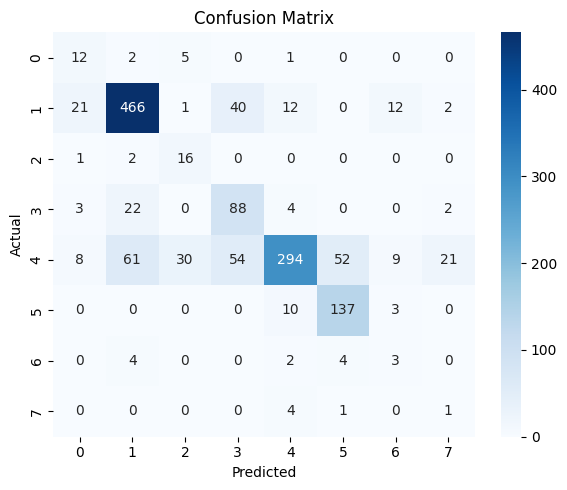

In [42]:
#Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

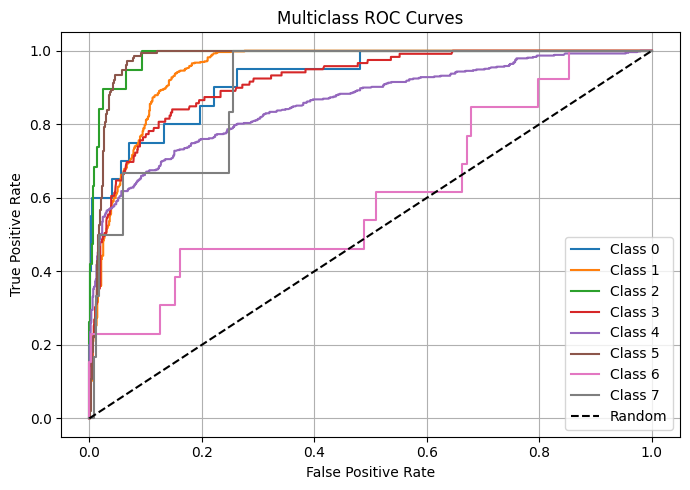

In [43]:
#ROC Curve (One-vs-Rest)
plt.figure(figsize=(7, 5))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {classes[i]}")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.title("Multiclass ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

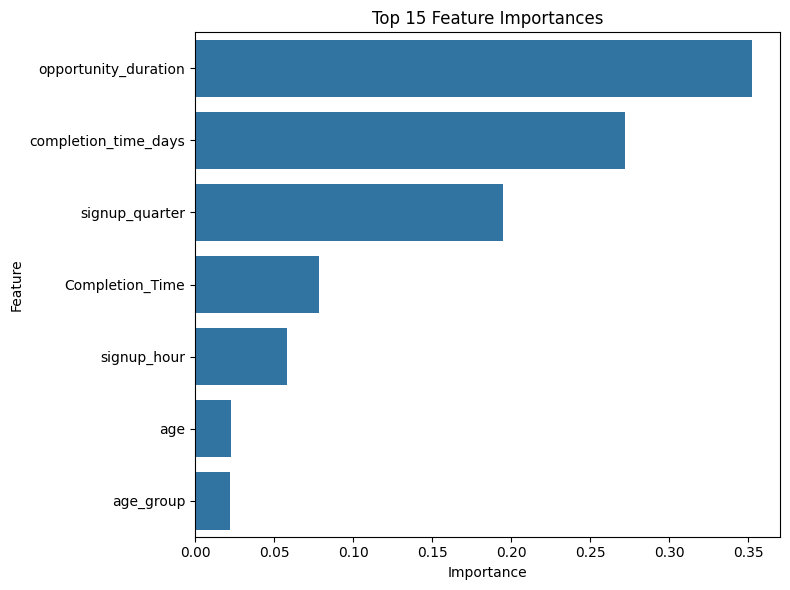

In [44]:
#Feature Importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=feat_imp.values[:15], y=feat_imp.index[:15])
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

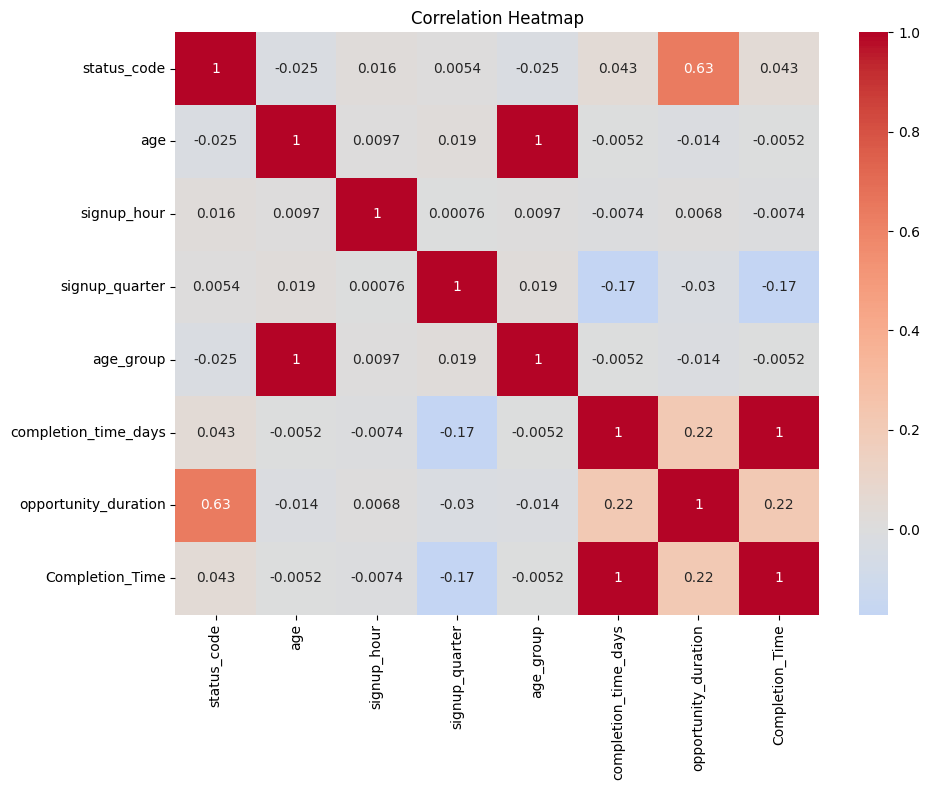

In [48]:
#Correlation Heatmap 
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()